Trial:  0
Adam: Epoch 20 Error=1.11656
Adam: Epoch 40 Error=1.10379
Adam: Epoch 60 Error=1.09925
Adam: Epoch 80 Error=1.09932
Adam: Epoch 100 Error=1.09925
Adam: Epoch 120 Error=1.09925
Adam: Epoch 140 Error=1.09925
Adam: Epoch 160 Error=1.09925
Adam: Epoch 180 Error=1.09925
Adam: Epoch 200 Error=1.09925
Trial:  1
Adam: Epoch 20 Error=0.89498
Adam: Epoch 40 Error=0.86172
Adam: Epoch 60 Error=0.86153
Adam: Epoch 80 Error=0.86149
Adam: Epoch 100 Error=0.86144
Adam: Epoch 120 Error=0.86144
Adam: Epoch 140 Error=0.86144
Adam: Epoch 160 Error=0.86144
Adam: Epoch 180 Error=0.86144
Adam: Epoch 200 Error=0.86144
Trial:  2
Adam: Epoch 20 Error=0.77666
Adam: Epoch 40 Error=0.75913
Adam: Epoch 60 Error=0.75670


/home/tmoleary/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:1859: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


Adam: Epoch 80 Error=0.75629
Adam: Epoch 100 Error=0.75626
Adam: Epoch 120 Error=0.75625
Adam: Epoch 140 Error=0.75625
Adam: Epoch 160 Error=0.75625
Adam: Epoch 180 Error=0.75625
Adam: Epoch 200 Error=0.75625
Trial:  3
Adam: Epoch 20 Error=0.90160
Adam: Epoch 40 Error=0.85443
Adam: Epoch 60 Error=0.85477
Adam: Epoch 80 Error=0.85429
Adam: Epoch 100 Error=0.85422
Adam: Epoch 120 Error=0.85420
Adam: Epoch 140 Error=0.85420
Adam: Epoch 160 Error=0.85420
Adam: Epoch 180 Error=0.85420
Adam: Epoch 200 Error=0.85420
Trial:  4
Adam: Epoch 20 Error=0.90964
Adam: Epoch 40 Error=0.90102
Adam: Epoch 60 Error=0.89472
Adam: Epoch 80 Error=0.89354
Adam: Epoch 100 Error=0.89356
Adam: Epoch 120 Error=0.89354
Adam: Epoch 140 Error=0.89354
Adam: Epoch 160 Error=0.89354
Adam: Epoch 180 Error=0.89354
Adam: Epoch 200 Error=0.89354
Trial:  5
Adam: Epoch 20 Error=0.90730
Adam: Epoch 40 Error=0.90442
Adam: Epoch 60 Error=0.89660
Adam: Epoch 80 Error=0.89509
Adam: Epoch 100 Error=0.89510
Adam: Epoch 120 Error=0

/home/tmoleary/school/rlnn-tetris/server/Board.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig, self.ax = plt.subplots()


Adam: Epoch 120 Error=0.81405
Adam: Epoch 140 Error=0.81405
Adam: Epoch 160 Error=0.81405
Adam: Epoch 180 Error=0.81405
Adam: Epoch 200 Error=0.81405
Trial:  21
Adam: Epoch 20 Error=0.95634
Adam: Epoch 40 Error=0.90761
Adam: Epoch 60 Error=0.90700
Adam: Epoch 80 Error=0.90593
Adam: Epoch 100 Error=0.90593
Adam: Epoch 120 Error=0.90592
Adam: Epoch 140 Error=0.90592
Adam: Epoch 160 Error=0.90592
Adam: Epoch 180 Error=0.90592
Adam: Epoch 200 Error=0.90592
Trial:  22
Adam: Epoch 20 Error=0.86440
Adam: Epoch 40 Error=0.83910
Adam: Epoch 60 Error=0.83619
Adam: Epoch 80 Error=0.83604
Adam: Epoch 100 Error=0.83591
Adam: Epoch 120 Error=0.83591
Adam: Epoch 140 Error=0.83591
Adam: Epoch 160 Error=0.83591
Adam: Epoch 180 Error=0.83591
Adam: Epoch 200 Error=0.83591
Trial:  23
Adam: Epoch 20 Error=0.93699
Adam: Epoch 40 Error=0.93039
Adam: Epoch 60 Error=0.92383
Adam: Epoch 80 Error=0.92258
Adam: Epoch 100 Error=0.92260
Adam: Epoch 120 Error=0.92258
Adam: Epoch 140 Error=0.92258
Adam: Epoch 160 Err

Trial:  48
Adam: Epoch 20 Error=0.89889
Adam: Epoch 40 Error=0.87922
Adam: Epoch 60 Error=0.87543
Adam: Epoch 80 Error=0.87499
Adam: Epoch 100 Error=0.87492
Adam: Epoch 120 Error=0.87492
Adam: Epoch 140 Error=0.87492
Adam: Epoch 160 Error=0.87492
Adam: Epoch 180 Error=0.87492
Adam: Epoch 200 Error=0.87492
Trial:  49
Adam: Epoch 20 Error=0.91476
Adam: Epoch 40 Error=0.86860
Adam: Epoch 60 Error=0.86894
Adam: Epoch 80 Error=0.86850
Adam: Epoch 100 Error=0.86843
Adam: Epoch 120 Error=0.86841
Adam: Epoch 140 Error=0.86841
Adam: Epoch 160 Error=0.86841
Adam: Epoch 180 Error=0.86841
Adam: Epoch 200 Error=0.86841
Trial:  50
Adam: Epoch 20 Error=0.91676
Adam: Epoch 40 Error=0.90060
Adam: Epoch 60 Error=0.89618
Adam: Epoch 80 Error=0.89554
Adam: Epoch 100 Error=0.89551
Adam: Epoch 120 Error=0.89550
Adam: Epoch 140 Error=0.89550
Adam: Epoch 160 Error=0.89550
Adam: Epoch 180 Error=0.89550
Adam: Epoch 200 Error=0.89550
Trial:  51
Adam: Epoch 20 Error=0.89618
Adam: Epoch 40 Error=0.87437
Adam: Epoc

Trial:  77
Adam: Epoch 20 Error=0.91458
Adam: Epoch 40 Error=0.89509
Adam: Epoch 60 Error=0.89140
Adam: Epoch 80 Error=0.89099
Adam: Epoch 100 Error=0.89091
Adam: Epoch 120 Error=0.89091
Adam: Epoch 140 Error=0.89091
Adam: Epoch 160 Error=0.89091
Adam: Epoch 180 Error=0.89091
Adam: Epoch 200 Error=0.89091
Trial:  78
Adam: Epoch 20 Error=0.89602
Adam: Epoch 40 Error=0.87686
Adam: Epoch 60 Error=0.87293
Adam: Epoch 80 Error=0.87246
Adam: Epoch 100 Error=0.87239
Adam: Epoch 120 Error=0.87239
Adam: Epoch 140 Error=0.87239
Adam: Epoch 160 Error=0.87239
Adam: Epoch 180 Error=0.87239
Adam: Epoch 200 Error=0.87239
Trial:  79
Adam: Epoch 20 Error=0.97574
Adam: Epoch 40 Error=0.93649
Adam: Epoch 60 Error=0.93668
Adam: Epoch 80 Error=0.93663
Adam: Epoch 100 Error=0.93650
Adam: Epoch 120 Error=0.93648
Adam: Epoch 140 Error=0.93648
Adam: Epoch 160 Error=0.93648
Adam: Epoch 180 Error=0.93648
Adam: Epoch 200 Error=0.93648
Trial:  80
Adam: Epoch 20 Error=0.88634
Adam: Epoch 40 Error=0.85816
Adam: Epoc

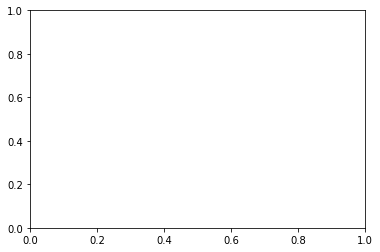

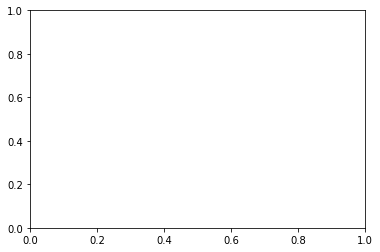

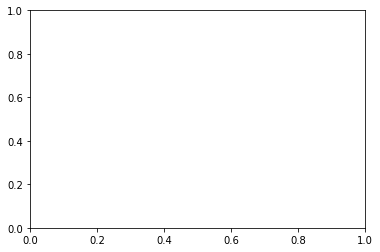

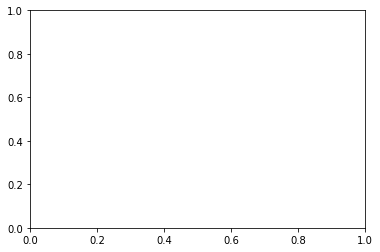

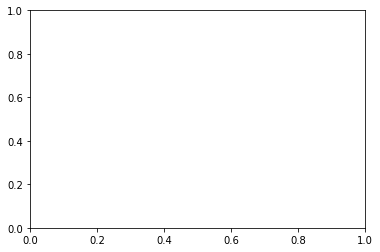

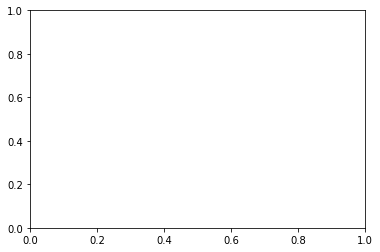

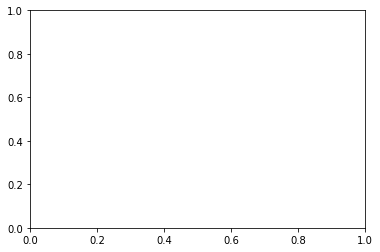

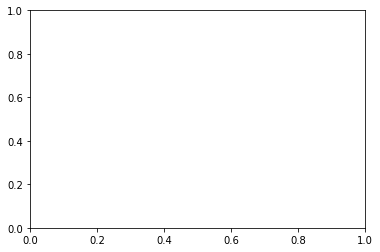

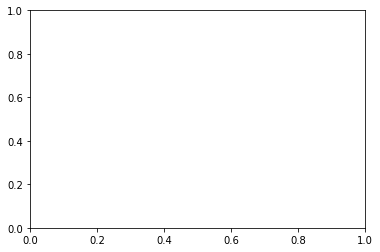

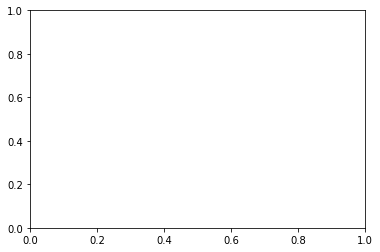

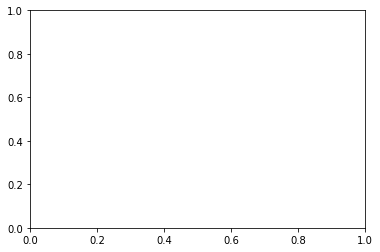

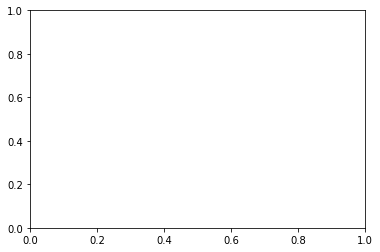

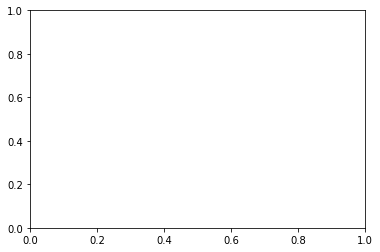

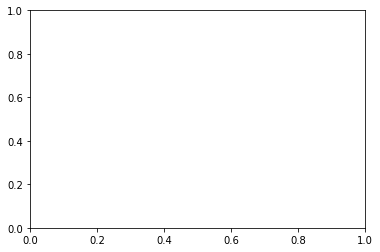

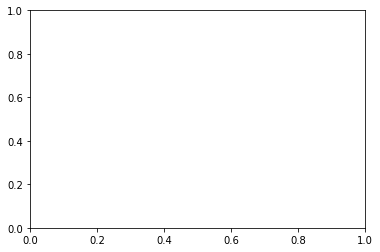

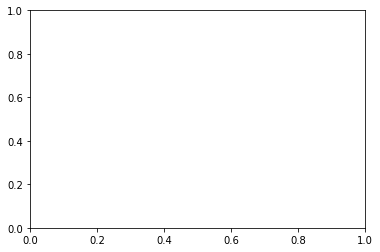

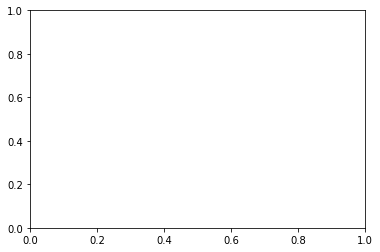

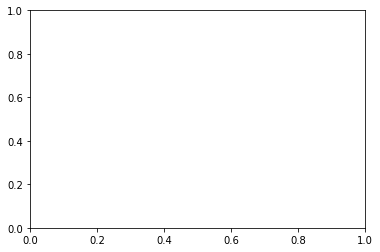

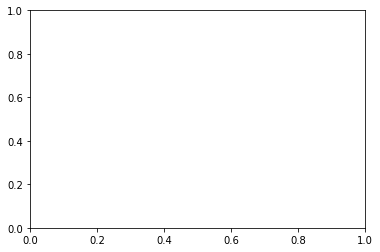

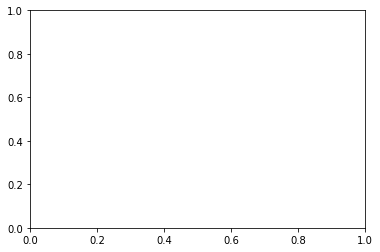

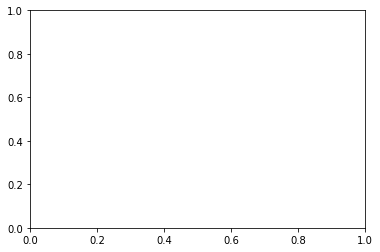

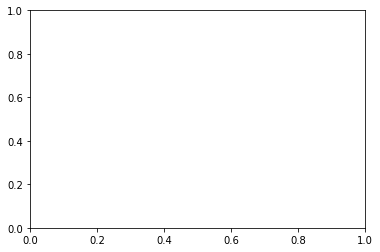

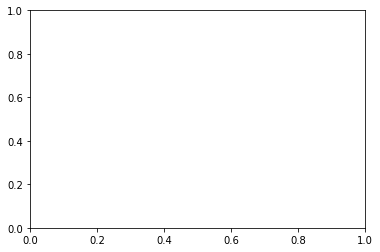

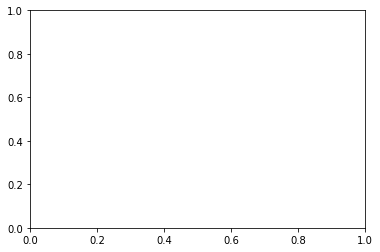

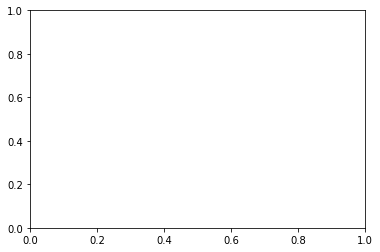

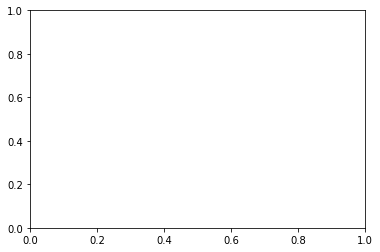

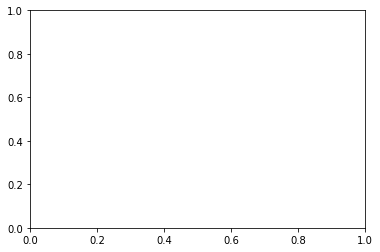

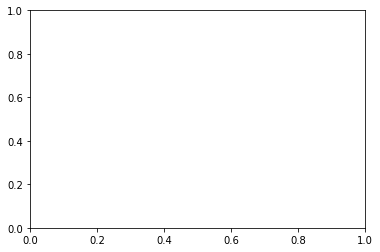

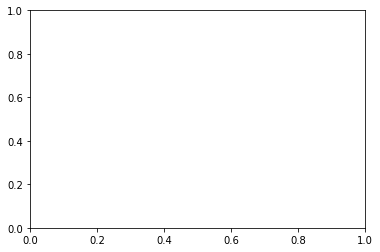

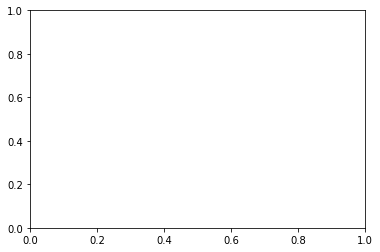

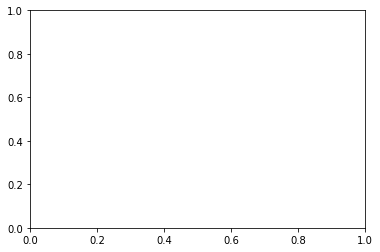

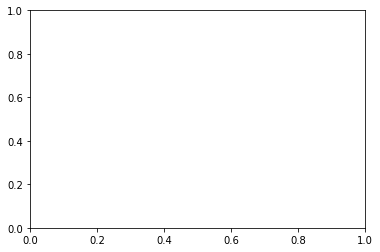

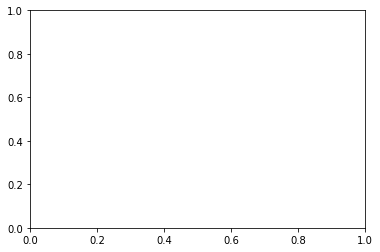

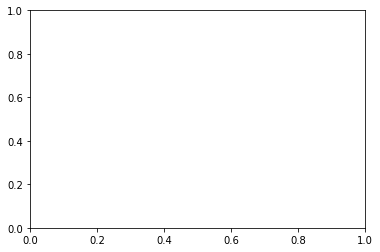

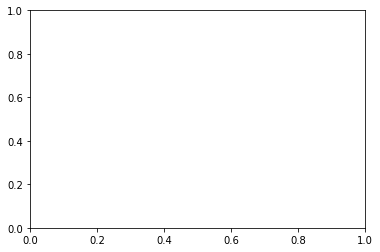

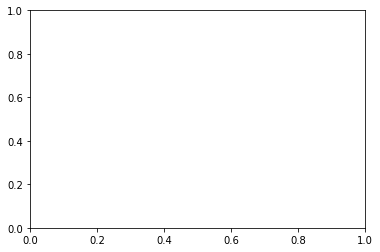

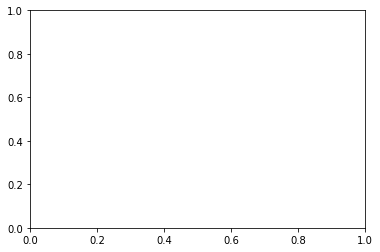

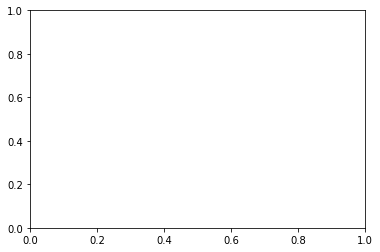

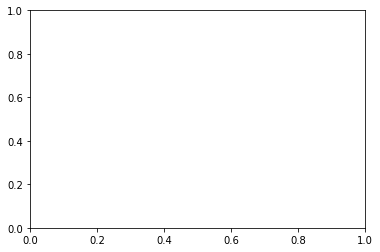

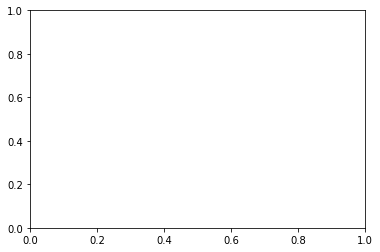

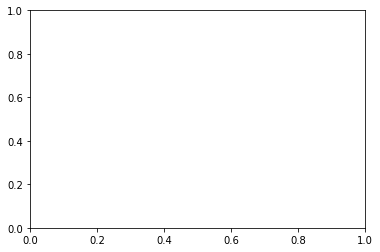

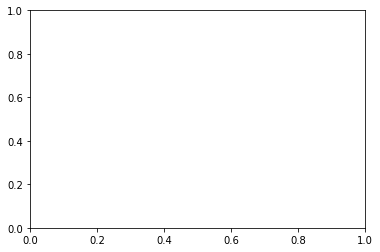

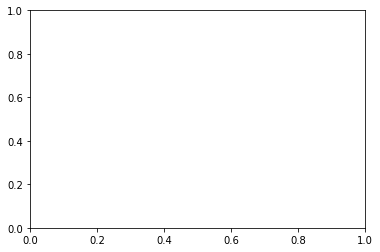

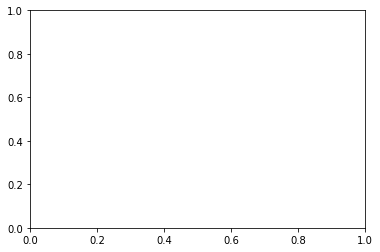

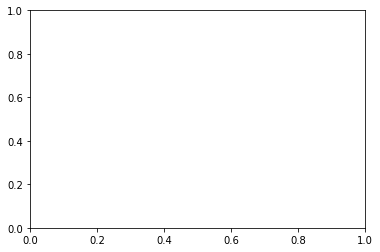

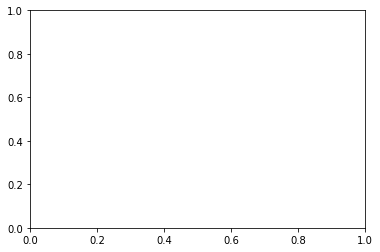

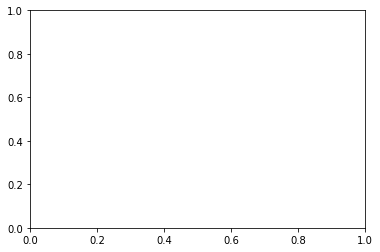

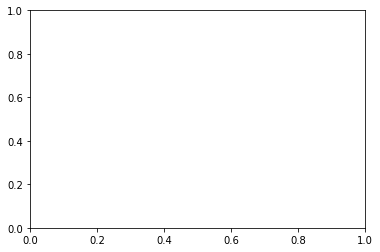

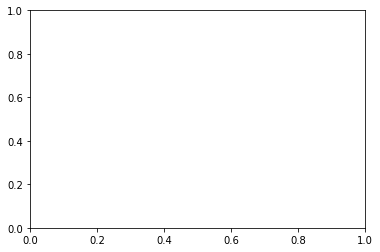

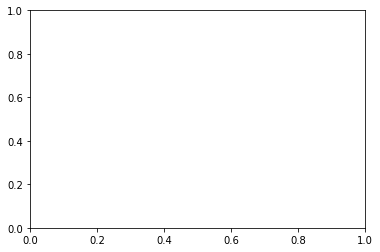

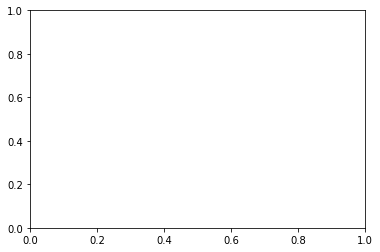

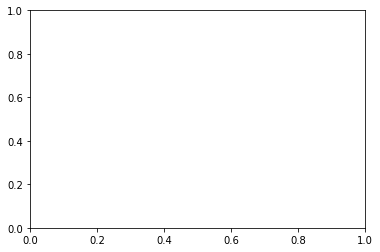

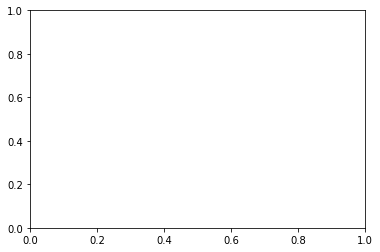

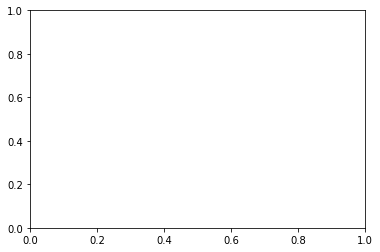

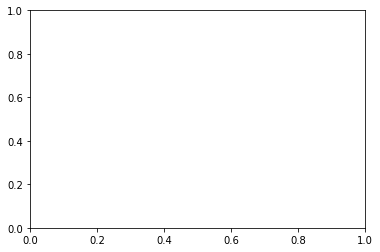

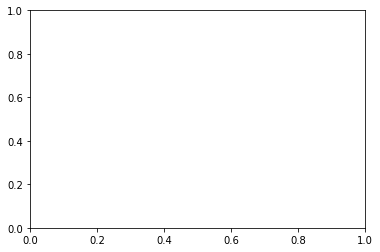

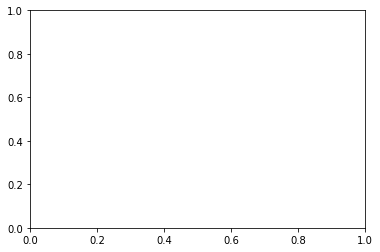

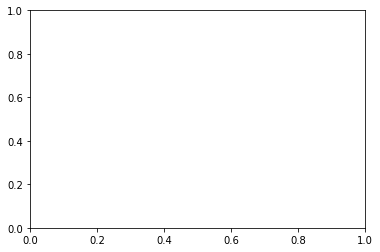

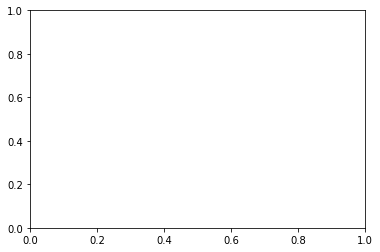

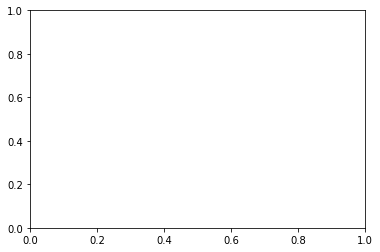

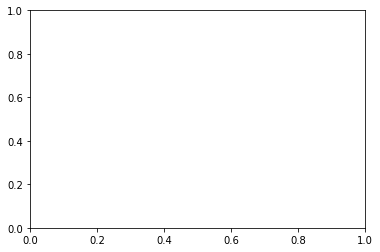

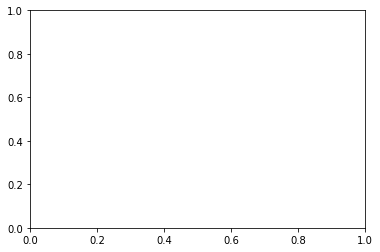

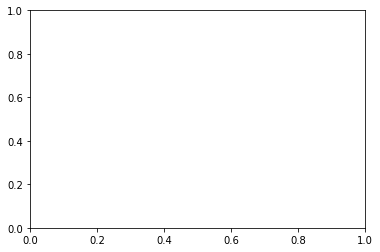

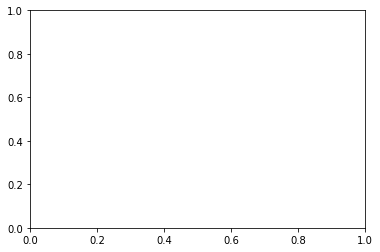

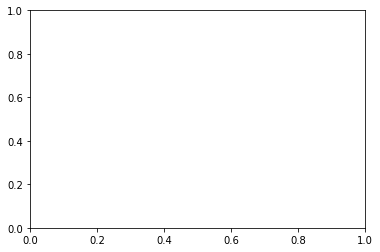

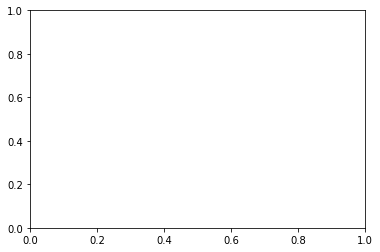

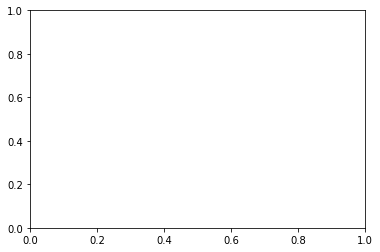

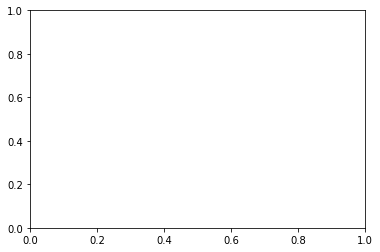

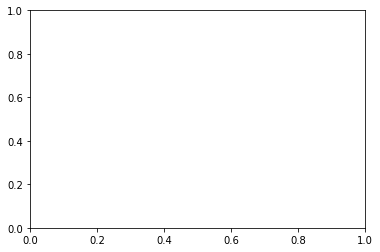

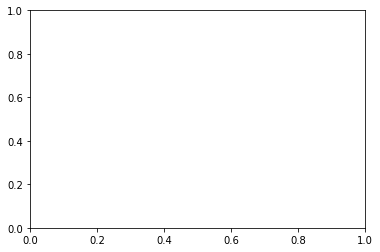

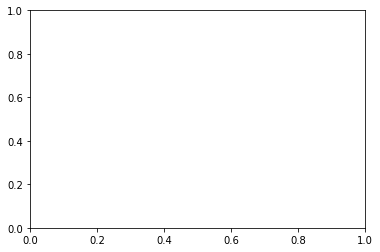

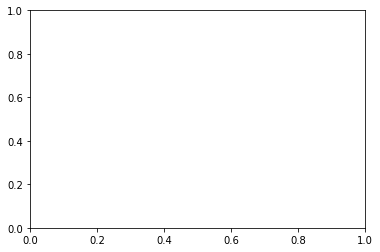

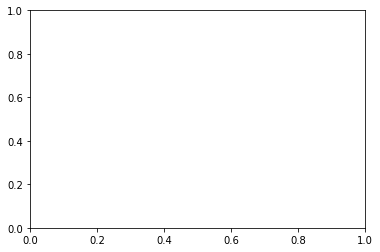

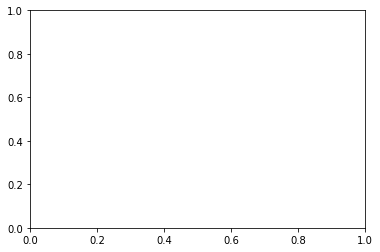

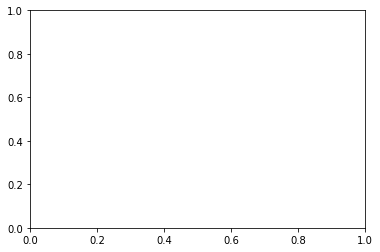

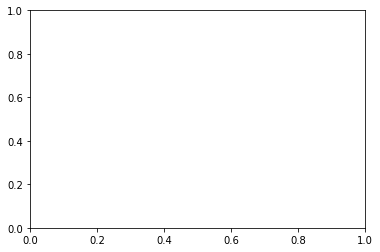

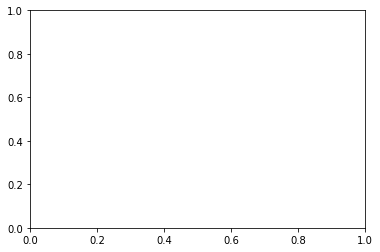

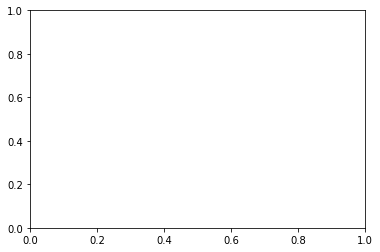

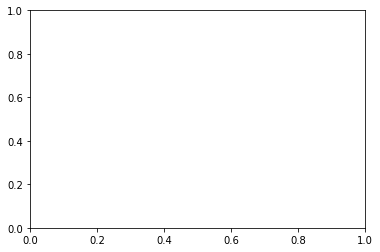

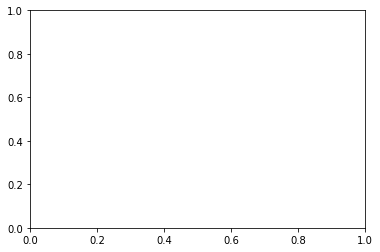

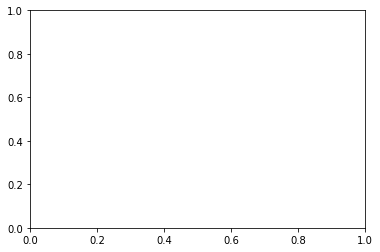

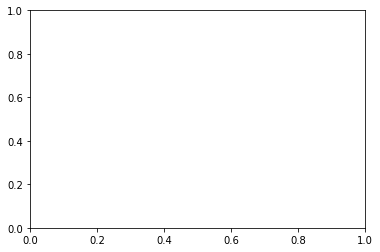

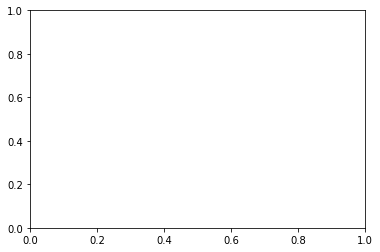

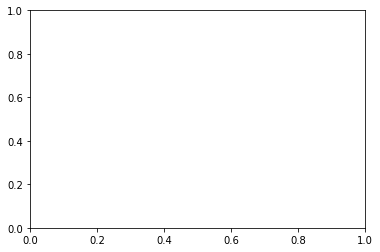

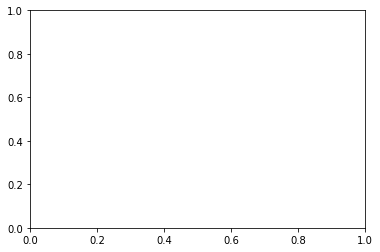

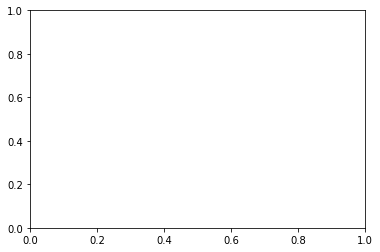

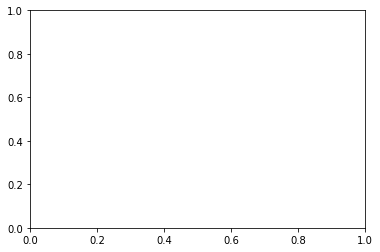

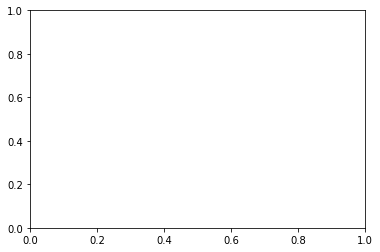

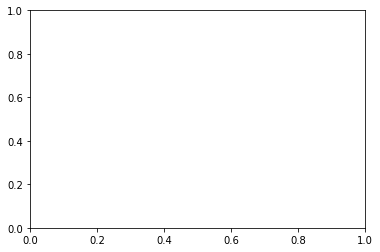

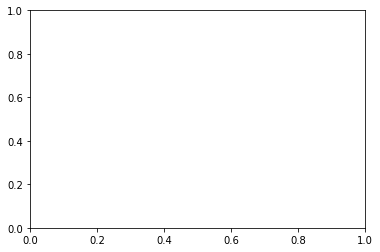

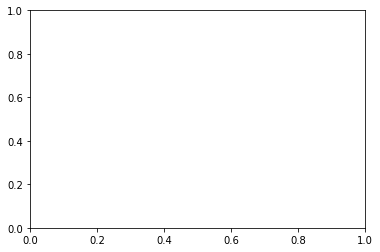

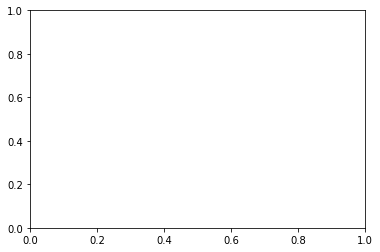

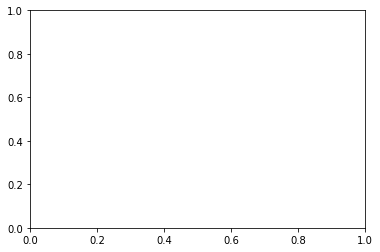

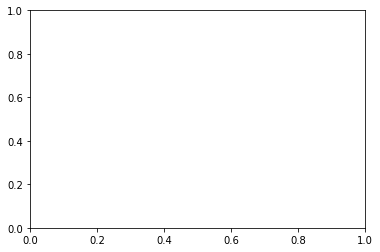

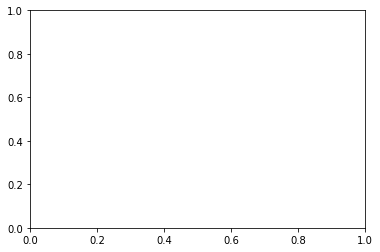

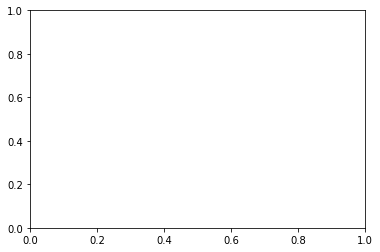

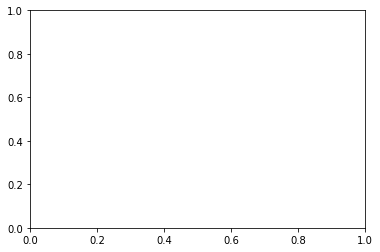

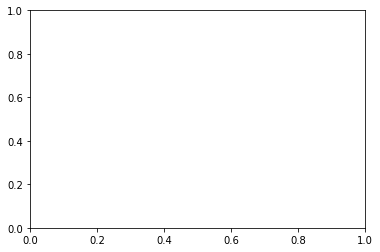

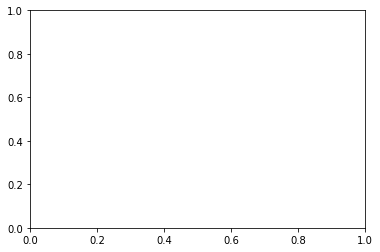

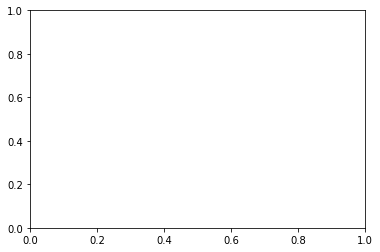

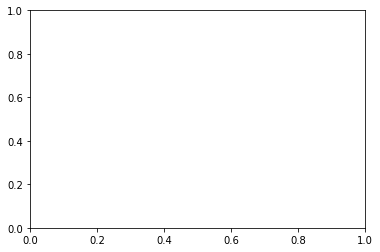

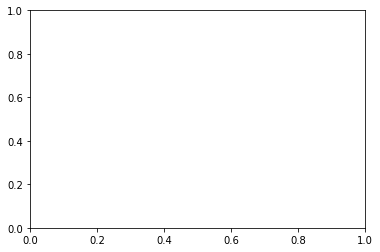

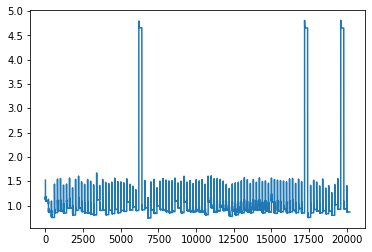

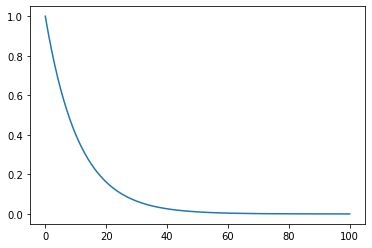

ValueError: x and y must have same first dimension, but have shapes (20200,) and (2020, 18)

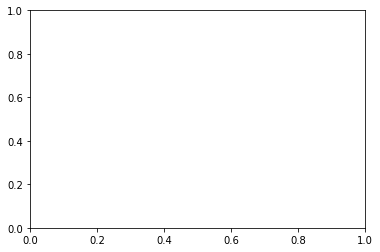

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MovementNN import MovementNN
    
n_trials = 101
n_steps_per_trial = 20
n_epochs = 200
learning_rate = 0.05
n_hidden = [50, 25]
gamma = 0.8
final_epsilon = 0.0001  
epsilon = 1.0
trial_animations = [1, 10, 100, 500, 1000, 5000, 10000, 50000, 75000, 99997, 99998, 99999, 100000]


movementNN = MovementNN(n_trials, n_steps_per_trial, n_epochs,
                        learning_rate, n_hidden, gamma, final_epsilon, epsilon, trial_animations)

movementNN.train()

# Error Trace
plt.plot(np.arange(0, n_trials * n_epochs), movementNN.error_trace)
plt.show()

# Epsilon Trace
plt.plot(np.arange(0, n_trials), movementNN.epsilon_trace)
plt.show()

# X Trace
plt.plot(np.arange(0, n_trials * n_epochs), movementNN.x_trace)
plt.show()

# R Trace
plt.plot(np.arange(0, n_trials * n_steps_per_trial), movementNN.r_trace)
plt.show()
